In [1]:
!pip install noisereduce

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import noisereduce as nr

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
filename='/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data'

In [4]:
!pip install resampy


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
     - -------------------------------------- 0.2/3.1 MB 3.1 MB/s eta 0:00:01
     ------ --------------------------------- 0.5/3.1 MB 5.2 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.1 MB 7.3 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.1 MB 9.0 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.1 MB 10.9 MB/s eta 0:00:01
     ---------------------------------------  3.1/3.1 MB 11.5 MB/s eta 0:00:01
     ---------------------------------------- 3.1/3.1 MB 9.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import os
import pandas as pd
import librosa

import numpy as np
from scipy.io import wavfile as wav
from sklearn.decomposition import PCA

def traverse_subfolders(subfolders):
    audio_files = []
    subfolder_names = []

    for subfolder in subfolders:
        subfolder_name = os.path.basename(subfolder)
        audio_files.extend(get_audio_files(subfolder))
        subfolder_names.extend([subfolder_name] * len(get_audio_files(subfolder)))

    return audio_files, subfolder_names

def get_audio_files(subfolder):
    audio_files = []

    for root, dirs, files in os.walk(subfolder):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))

    return audio_files
def remove_background_noise(audio):
    # Set parameters for noise reduction
    n_fft = 2048  # Window size for FFT
    hop_length = 512  # Hop length for FFT
    n_std_thresh = 1.5  # Threshold for noise reduction

    # Apply noise reduction using spectral subtraction
    reduced_noise = nr.reduce_noise(audio_clip=audio, noise_clip=None, n_fft=n_fft, hop_length=hop_length, n_std_thresh=n_std_thresh)

    return reduced_noise

def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    audio = remove_background_noise(audio)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

def process_audio_files(audio_files, subfolder_names, n_components):
    data = []

    for audio_file, subfolder_name in zip(audio_files, subfolder_names):
        compressed_data = features_extractor(audio_file)  # Extract MFCC features

        data.append([audio_file, compressed_data, subfolder_name])

    df = pd.DataFrame(data, columns=["File", "Compressed Data", "Subfolder Name"])
    return df


def compress_audio_pca(audio_data, n_components):
    audio_data_2d = audio_data.reshape(-1, 1)
    pca = PCA(n_components=n_components)
    compressed_data_2d = pca.fit_transform(audio_data_2d)
    compressed_data = compressed_data_2d.reshape(-1)

    return compressed_data


subfolders = ['/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/belly_pain',
              '/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/burping',
              '/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/discomfort',
              '/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/hungry',
              '/kaggle/input/baby-cry-detection/donateacry_corpus_cleaned_and_updated_data/tired']

n_components = 1

audio_files, subfolder_names = traverse_subfolders(subfolders)
df = process_audio_files(audio_files, subfolder_names, n_components)
print(df)

Empty DataFrame
Columns: [File, Compressed Data, Subfolder Name]
Index: []


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = df.drop("File",axis=1)

In [10]:
data = df.to_csv("Audio_data.csv")

In [11]:
df.rename(columns={"Subfolder Name":"class"},inplace=True)
df.head()

,Compressed Data,class


In [27]:
for i in range(457):

    df["shape"] = len(df["Compressed Data"][i])
df.head(20)

,Compressed Data,class,shape
0,"[-433.8168, 93.447205, 0.1912862, -10.415295, ...",belly_pain,40
1,"[-395.30914, 128.01904, -47.220932, 1.3578547,...",belly_pain,40
2,"[-426.70706, 157.33188, -52.70597, -14.5242, 1...",belly_pain,40
3,"[-252.29735, 145.54681, -58.926727, -16.598595...",belly_pain,40
4,"[-428.3942, 148.9, -69.3062, -15.013275, 28.95...",belly_pain,40
5,"[-364.82013, 151.83423, -122.37543, -24.735775...",belly_pain,40
6,"[-499.4247, 112.08116, -49.807816, -18.21421, ...",belly_pain,40
7,"[-417.36902, 195.04312, -93.95171, -6.475128, ...",belly_pain,40
8,"[-402.05515, 153.38997, -106.98005, -21.820833...",belly_pain,40
9,"[-389.0387, 168.44524, -67.22318, -17.126299, ...",belly_pain,40


In [12]:
x = df["Compressed Data"]
y=df["class"]
x.shape

(0,)

[]

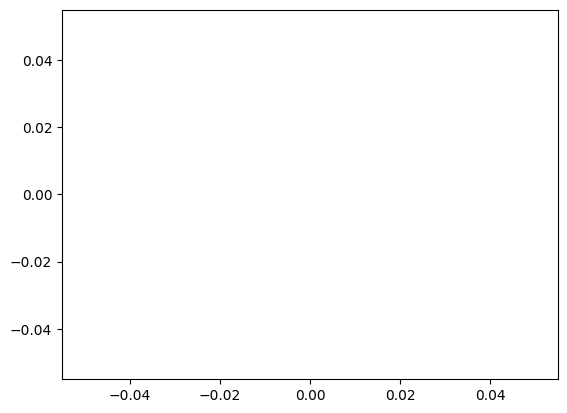

In [13]:
import seaborn as sns
sns.histplot(x=y,data=df, kde=True, bins=20, color='red')
plt.plot()

In [14]:
pip install pygal


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pygal from https://files.pythonhosted.org/packages/29/83/94e10cdc24489caef1ffcf9c3c2836fc35eff0f1c1d60d609d55d449820c/pygal-3.0.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for importlib-metadata from https://files.pythonhosted.org/packages/c0/8b/d8427f023c081a8303e6ac7209c16e6878f2765d5b59667f3903fbcfd365/importlib_metadata-7.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for zipp>=0.5 from https://files.pythonhosted.org/packages/d9/66/48866fc6b158c81cc2bfecc04c480f105c6040e8b077bc54c634b4a67926/zipp-3.17.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/130.4 kB ? eta -:--:--
   ---------------------------------------- 130.4/130.4 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
df2 = df[['Compressed Data','class']]
df2 = df2.groupby(['class'],as_index= False).count()
df2.head()

,class,Compressed Data


<Axes: xlabel='class', ylabel='Proportion'>

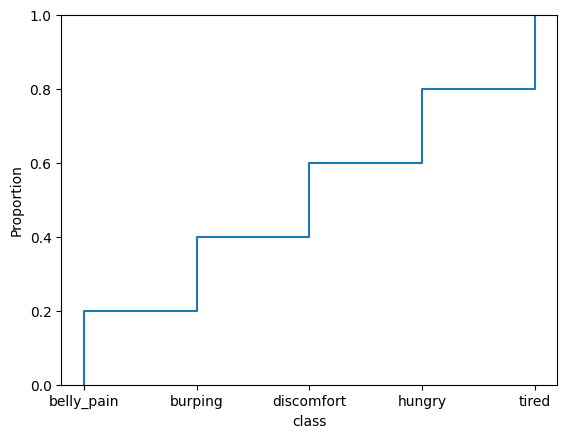

In [43]:
sns.ecdfplot(data=df2,x='class')

ValueError: 'label' must be of length 'x'

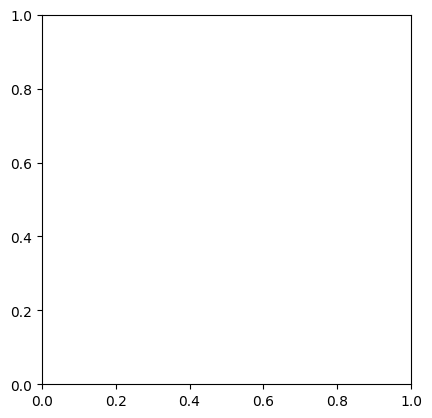

In [16]:
import matplotlib.pyplot as plt
import numpy as np
y = df2["Compressed Data"]
mylabels = ["belly_pain", "burping", "discomfort", "hungry","tired"]

plt.pie(y, labels = mylabels)
plt.show() 

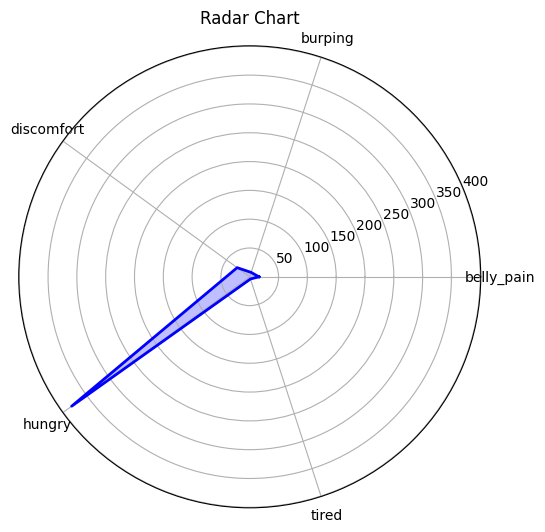

In [17]:

import numpy as np
import matplotlib.pyplot as plt

# Sample data
x_labels = ["belly_pain", "burping", "discomfort", "hungry", "tired"]
y = [16, 8, 27, 382, 4]

# Number of categories
num_categories = len(x_labels)

# Calculate angle for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Make the plot circular
y += y[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, y, color='blue', alpha=0.25)
ax.plot(angles, y, color='blue', linewidth=2)

# Add labels
ax.set_thetagrids(np.degrees(angles[:-1]), x_labels)
ax.set_title('Radar Chart')

# Show the plot
plt.show()
